# 📊 Sailing Agent Model Comparison

This notebook loads all training results from the `results/` directory and facilitates comparison between different models and hyperparameters.

In [16]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Results Data

In [17]:
def load_results(results_dir="../results"):
    data = []
    
    if not os.path.exists(results_dir):
        print(f"Directory {results_dir} not found!")
        return pd.DataFrame()
    
    # Iterate over all JSON files
    for filename in os.listdir(results_dir):
        if filename.endswith(".json"):
            filepath = os.path.join(results_dir, filename)
            try:
                with open(filepath, 'r') as f:
                    result = json.load(f)
                
                # Flatten the structure
                entry = {
                    'filename': filename,
                    'timestamp': result.get('metadata', {}).get('timestamp', 'N/A'),
                    'agent': result.get('metadata', {}).get('agent', 'Unknown'),
                }
                
                # Add Evaluation Metrics (Overall)
                if 'evaluation' in result and 'training_1' in result['evaluation']:
                    # Assumes training_1 is present, or takes limits
                    # Ideally we want overall averaged metrics if available
                    # Let's try to find the 'overall' like stats if they were saved, or take average of scenarios
                    
                    # Check if we have the structured overall stats from recent update
                    first_scenario = list(result['evaluation'].keys())[0]
                    eval_data = result['evaluation'][first_scenario]
                    
                    entry['success_rate'] = eval_data.get('success_rate', 0) * 100 if eval_data.get('success_rate', 0) <= 1.0 else eval_data.get('success_rate', 0)
                    entry['avg_reward'] = eval_data.get('mean_reward', 0)
                    entry['avg_steps'] = eval_data.get('mean_steps', 0)
                    entry['custom_score'] = eval_data.get('custom_score', 0)
                
                elif 'training' in result:
                    # Fallback to training metrics if eval not present
                    entry['success_rate'] = result['training'].get('final_success_rate', 0) * 100
                    entry['avg_reward'] = result['training'].get('avg_reward', 0)
                    entry['avg_steps'] = result['training'].get('avg_steps', 0)
                    entry['custom_score'] = 0 # Not calculated during training

                # Add Hyperparameters
                if 'hyperparameters' in result:
                    for k, v in result['hyperparameters'].items():
                        entry[f'hp_{k}'] = v
                
                data.append(entry)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return pd.DataFrame(data)

df = load_results()
print(f"Loaded {len(df)} results.")
if not df.empty:
    # Sort by timestamp descending
    df = df.sort_values('timestamp', ascending=False)

# Display first few rows
df.head()

Loaded 44 results.


,filename,timestamp,agent,success_rate,avg_reward,avg_steps,custom_score,hp_learning_rate,hp_discount_factor,hp_exploration_rate,hp_position_bins,hp_velocity_bins,hp_wind_bins,hp_wind_preview_steps,hp_grid_size,hp_q_init_high
43,20260120_033001_relative_agent.json,20260120_033001,relative_agent,100.0,155.088225,138.27,24.916002,0.2,0.99,0.3,NaN,NaN,NaN,NaN,NaN,10.0
42,20260120_032729_relative_agent.json,20260120_032729,relative_agent,0.0,0.000000,0.00,0.000000,0.2,0.99,0.3,NaN,NaN,NaN,NaN,NaN,10.0
41,20260120_030343_vmg_agent.json,20260120_030343,vmg_agent,100.0,205.684483,157.43,20.551744,0.2,0.99,0.3,8.0,5.0,8.0,3.0,32.0,10.0
40,20260120_030028_vmg_agent.json,20260120_030028,vmg_agent,100.0,195.220537,149.57,86.995205,0.2,0.99,0.3,10.0,5.0,8.0,3.0,32.0,10.0
39,20260120_025617_vmg_agent.json,20260120_025617,vmg_agent,100.0,206.887533,153.80,86.688875,0.2,0.99,0.3,10.0,5.0,8.0,3.0,32.0,10.0


## 2. Leaderboard 🏆

In [18]:
if not df.empty:
    # Select relevant columns for leaderboard
    cols = ['timestamp', 'agent', 'success_rate', 'avg_reward', 'avg_steps', 'custom_score']
    # Add hyperparam cols if they exist
    hp_cols = [c for c in df.columns if c.startswith('hp_')]
    cols.extend(hp_cols)
    
    leaderboard = df[cols].sort_values('custom_score', ascending=False)
    
    # Styling
    def highlight_best(s):
        is_max = s == s.max()
        return ['background-color: lightgreen' if v else '' for v in is_max]
    
    display(leaderboard.style.background_gradient(subset=['custom_score', 'success_rate'], cmap='Greens')\
                             .background_gradient(subset=['avg_steps'], cmap='Reds')\
                             .format({'success_rate': '{:.1f}%', 'avg_reward': '{:.1f}', 'avg_steps': '{:.1f}', 'custom_score': '{:.2f}'}))
else:
    print("No data available.")

,timestamp,agent,success_rate,avg_reward,avg_steps,custom_score,hp_learning_rate,hp_discount_factor,hp_exploration_rate,hp_position_bins,hp_velocity_bins,hp_wind_bins,hp_wind_preview_steps,hp_grid_size,hp_q_init_high
34,20260120_021827,vmg_agent,100.0%,286.7,59.6,96.91,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
40,20260120_030028,vmg_agent,100.0%,195.2,149.6,87.00,0.200000,0.990000,0.300000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
39,20260120_025617,vmg_agent,100.0%,206.9,153.8,86.69,0.200000,0.990000,0.300000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
36,20260120_024237,vmg_agent,100.0%,206.9,153.8,86.69,0.200000,0.990000,0.300000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
35,20260120_022914,vmg_agent,100.0%,211.1,157.5,86.36,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
26,20260120_014224,vmg_agent,100.0%,170.6,169.8,84.73,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
33,20260120_021656,vmg_agent,100.0%,187.9,184.2,83.45,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
28,20260120_014825,vmg_agent,92.0%,131.0,470.0,46.31,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
22,20260120_010617,vmg_agent,90.0%,133.7,513.6,39.98,0.150000,0.990000,0.050000,10.000000,5.000000,8.000000,3.000000,32.000000,10.000000
37,20260120_024718,vmg_agent,88.0%,118.4,559.9,33.20,0.200000,0.990000,0.300000,8.000000,5.000000,8.000000,3.000000,32.000000,10.000000


## 3. Visualization: Efficiency vs Success

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


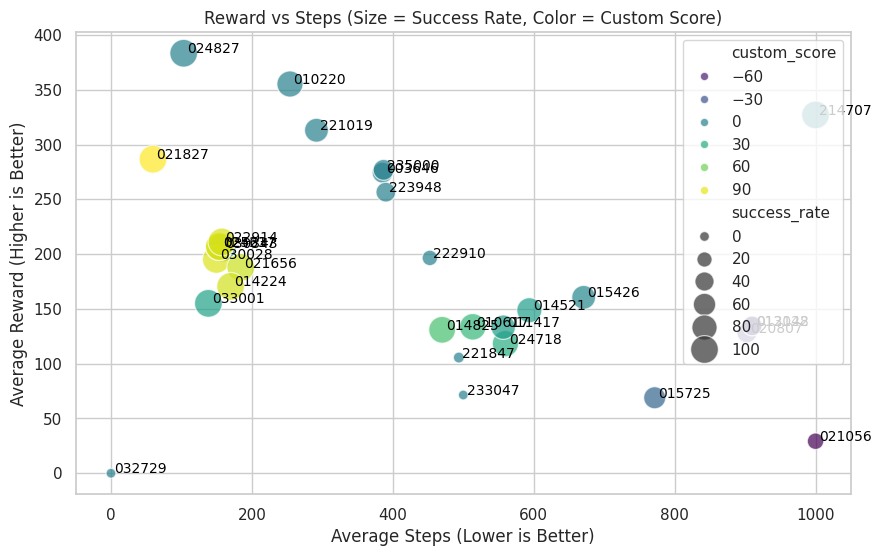

In [19]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=df, 
        x='avg_steps', 
        y='avg_reward', 
        size='success_rate', 
        hue='custom_score', 
        sizes=(50, 400), 
        palette='viridis',
        alpha=0.7
    )
    
    plt.title('Reward vs Steps (Size = Success Rate, Color = Custom Score)')
    plt.xlabel('Average Steps (Lower is Better)')
    plt.ylabel('Average Reward (Higher is Better)')
    
    # Add labels
    for line in range(0, df.shape[0]):
        plt.text(
            df.avg_steps.iloc[line]+5, 
            df.avg_reward.iloc[line], 
            df.timestamp.iloc[line][-6:], # Just show time
            horizontalalignment='left', 
            size='small', 
            color='black'
        )
        
    plt.show()
else:
    print("No data to plot.")

## 4. Hyperparameter Analysis
Select a hyperparameter to see its impact on the Custom Score.

In [20]:
import ipywidgets as widgets

if not df.empty and len(hp_cols) > 0:
    def plot_hp_impact(hp_name):
        plt.figure(figsize=(8, 5))
        # Check if numeric
        if pd.api.types.is_numeric_dtype(df[hp_name]):
            sns.regplot(data=df, x=hp_name, y='custom_score')
        else:
            sns.boxplot(data=df, x=hp_name, y='custom_score')
            sns.stripplot(data=df, x=hp_name, y='custom_score', color='black', alpha=0.5)
            
        plt.title(f'Impact of {hp_name} on Custom Score')
        plt.ylabel('Custom Score')
        plt.show()
    
    widgets.interact(plot_hp_impact, hp_name=sorted(hp_cols));
else:
    print("No hyperparameter data found.")

interactive(children=(Dropdown(description='hp_name', options=('hp_discount_factor', 'hp_exploration_rate', 'h…